![texto alternativo](https://user-images.githubusercontent.com/50641494/85175904-ebb62f00-b24e-11ea-81cb-438de552e34d.PNG)

🐍 2021


![](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F17d6223b-b555-4abe-9b70-45c3cc77e20e%2FUntitled.png?table=block&id=5ac8cd71-ea26-4f9a-b719-7eac6264096d&spaceId=62aa27de-48fd-4703-8a40-2de64b627b11&width=1420&userId=&cache=v2)

[clase en texto](https://www.notion.so/Clase-Matplotlib-5298076f528f41a594f80735a3d6b5e0)

## 01 Levantar los datos

## Traemos datos desde Github

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/phdnico/ejemplo_con_pandas/main/datos.csv")

## 02 Preparar los datos

In [ ]:
## borramos la columna que no utilizaremos

del df['Marca temporal']

## renombramos las columnas
df = df.rename(columns={'Nombre':'nombre',
                   'Apellido':'apellido',
                   'Nickname o apodo ':'apodo',
                   'Edad':'edad',
                   'Conocimiento de programación con Python':'level',
                   'Año de Nacimiento ':'nacimiento'})


## completamos los espacios vacíos  en los apodos

filas = df.shape[0]
for i in range(0,filas):
  if(pd.isna(df["apodo"][i])): # pd.isna()
    if(len(df['nombre'][i])<=5):
      var_apodo = df['nombre'][i]
      df.at[i, 'apodo'] = var_apodo
    else:
      var_apodo = df['nombre'][i][0:4]+df['apellido'][i][0:2]
      df.at[i, 'apodo'] = var_apodo

# validemos el año de nacimiento contra la edad
df['valido'] = 2021-df['edad']-df['nacimiento'] <=1

# contamos las vocales de los nombres y creamos columnas para cada una (a,e,i,o,u)

## utilizamos una función que cuenta letra
def buscarLetra(texto,letra_buscada):
  '''ingresa un texto y me devuelve la cantidad de letras a'''
  # 1 ) todo a minúsculas
  texto = texto.lower()
  # 2) contador que suma 1 cuando es igual a una A
  contador = 0

  for letra in texto:
    if letra == letra_buscada:
      contador = contador + 1
  # retorno la letra buscada y su cantidad
  return contador

## nuevas columnas con cada una de las vocales
df['a'] = df['nombre'].apply(buscarLetra, letra_buscada = 'a')
df['e'] = df['nombre'].apply(buscarLetra, letra_buscada = 'e')
df['i'] = df['nombre'].apply(buscarLetra, letra_buscada = 'i')
df['o'] = df['nombre'].apply(buscarLetra, letra_buscada = 'o')
df['u'] = df['nombre'].apply(buscarLetra, letra_buscada = 'u')

## suma de todas las vocales x nombre
df['vocales'] = df[['a','e','i','o','u']].sum(axis=1)

In [ ]:
df

,nombre,apellido,apodo,edad,level,nacimiento,valido,a,e,i,o,u,vocales
0,Jose Maria,Vallorani,JoseMa,20,Mucho,1900,False,2,1,1,1,0,5
1,Maria-Ines,Orellana,Maru,78,Algo,1942,True,2,1,2,0,0,5
2,Agustin,Bonilla,Tincho,31,Bastante,1989,True,1,0,1,0,1,3
3,Ioan,Cervera,Ioan,23,Mucho,1997,True,1,0,1,1,0,3
4,Avelina,Haro,AvelHa,34,Mucho,1986,True,2,1,1,0,0,4
5,Anastasia,Picazo,AnasPi,78,Nada,1942,True,4,0,1,0,0,5
6,Yaiza,Oliver,Yaiza,22,Algo,1995,False,2,0,1,0,0,3
7,Arturo,Sanchez,Rey,19,Bastante,2001,True,1,0,0,1,1,3
8,Jose,Casas,Pepe,22,Mucho,1998,True,0,1,0,1,0,2
9,Cristian,Verdugo,CrisVe,21,Mucho,1999,True,1,0,2,0,0,3


# 03 Matplotlib

In [ ]:
import matplotlib.pyplot as plt

[referencia](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)

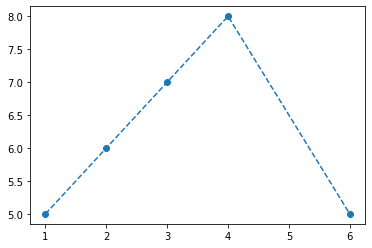

In [ ]:
x = [1,2,3,4,6]
y = [5,6,7,8,5]
plt.plot(x,y,linestyle='dashed', marker='o');

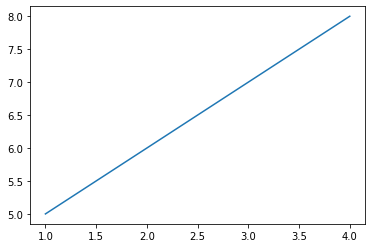

In [ ]:
# Magdalena :D
import matplotlib.pyplot as plt
x = [1,2,3,4]
y = [5,6,7,8]
plt.plot(x,y)

## recta y = ax+b 😨

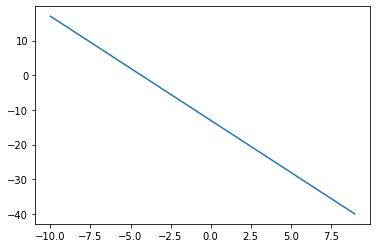

In [ ]:
import numpy as np
x = np.arange(-10,10)
a = -3
b = -13
# 2x + 1
y = a*x +b
plt.plot(x,y);

In [ ]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

## ¿Entonces podemos graficar una parábola ?

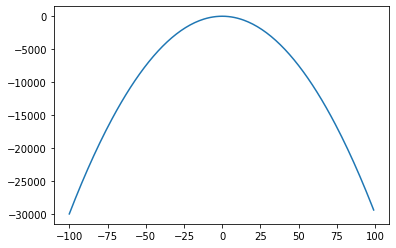

In [ ]:
import numpy as np
x = np.arange(-100,100)
a = -3
b = 3
y = a*x**2+ b  # 3x2 + 3
plt.plot(x,y)

# Trabajemos con el dataset

### Nacimiento vs edad
¿ será correcto decir que a mayor edad menor año de nacimiento? 🤔

In [ ]:
df

,nombre,apellido,apodo,edad,level,nacimiento,valido,a,e,i,o,u,vocales
0,Jose Maria,Vallorani,JoseMa,20,Mucho,1900,False,2,1,1,1,0,5
1,Maria-Ines,Orellana,Maru,78,Algo,1942,True,2,1,2,0,0,5
2,Agustin,Bonilla,Tincho,31,Bastante,1989,True,1,0,1,0,1,3
3,Ioan,Cervera,Ioan,23,Mucho,1997,True,1,0,1,1,0,3
4,Avelina,Haro,AvelHa,34,Mucho,1986,True,2,1,1,0,0,4
5,Anastasia,Picazo,AnasPi,78,Nada,1942,True,4,0,1,0,0,5
6,Yaiza,Oliver,Yaiza,22,Algo,1995,False,2,0,1,0,0,3
7,Arturo,Sanchez,Rey,19,Bastante,2001,True,1,0,0,1,1,3
8,Jose,Casas,Pepe,22,Mucho,1998,True,0,1,0,1,0,2
9,Cristian,Verdugo,CrisVe,21,Mucho,1999,True,1,0,2,0,0,3


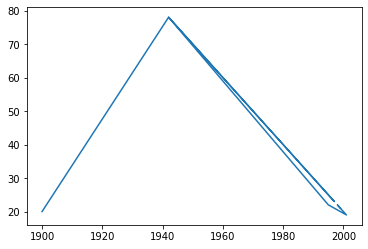

In [ ]:
plt.plot(df['nacimiento'],df['edad'])

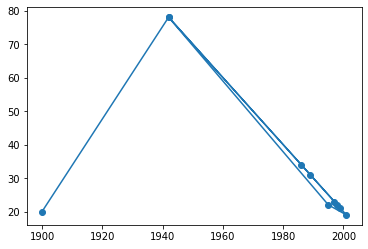

In [ ]:
plt.plot(df['nacimiento'],df['edad'],marker='o')

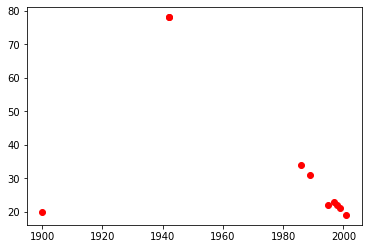

In [ ]:
plt.plot(df['nacimiento'],df['edad'],'ro')

### Filtrar

In [ ]:
df_filtrado = df[df['valido']== True]
df_filtrado

,nombre,apellido,apodo,edad,level,nacimiento,valido,a,e,i,o,u,vocales
1,Maria-Ines,Orellana,Maru,78,Algo,1942,True,2,1,2,0,0,5
2,Agustin,Bonilla,Tincho,31,Bastante,1989,True,1,0,1,0,1,3
3,Ioan,Cervera,Ioan,23,Mucho,1997,True,1,0,1,1,0,3
4,Avelina,Haro,AvelHa,34,Mucho,1986,True,2,1,1,0,0,4
5,Anastasia,Picazo,AnasPi,78,Nada,1942,True,4,0,1,0,0,5
7,Arturo,Sanchez,Rey,19,Bastante,2001,True,1,0,0,1,1,3
8,Jose,Casas,Pepe,22,Mucho,1998,True,0,1,0,1,0,2
9,Cristian,Verdugo,CrisVe,21,Mucho,1999,True,1,0,2,0,0,3


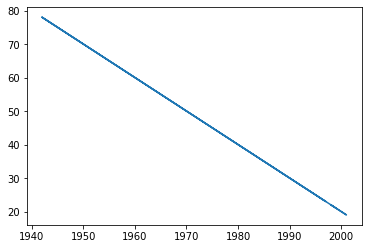

In [ ]:
x = df_filtrado['nacimiento']
y = df_filtrado['edad']
plt.plot(x,y)

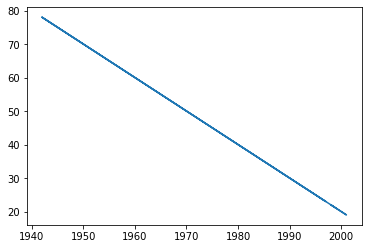

In [ ]:
plt.plot(df_filtrado['nacimiento'],df_filtrado['edad'])

#### coloquemos nombres a los ejes


Text(0, 0.5, 'edad')

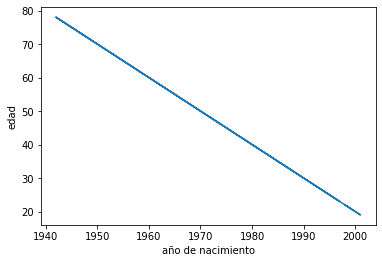

In [ ]:
plt.plot(df_filtrado['nacimiento'],df_filtrado['edad'])
plt.xlabel("año de nacimiento")
plt.ylabel("edad")

## Cantidades de vocales

In [ ]:
df_filtrado.head()

,nombre,apellido,apodo,edad,level,nacimiento,valido,a,e,i,o,u,vocales
1,Maria-Ines,Orellana,Maru,78,Algo,1942,True,2,1,2,0,0,5
2,Agustin,Bonilla,Tincho,31,Bastante,1989,True,1,0,1,0,1,3
3,Ioan,Cervera,Ioan,23,Mucho,1997,True,1,0,1,1,0,3
4,Avelina,Haro,AvelHa,34,Mucho,1986,True,2,1,1,0,0,4
5,Anastasia,Picazo,AnasPi,78,Nada,1942,True,4,0,1,0,0,5


In [ ]:
df_filtrado[['a','e','i','o','u']].sum(axis=0)

a    12
e     3
i     8
o     3
u     2
dtype: int64

In [ ]:
df_filtrado

,nombre,apellido,apodo,edad,level,nacimiento,valido,a,e,i,o,u,vocales
1,Maria-Ines,Orellana,Maru,78,Algo,1942,True,2,1,2,0,0,5
2,Agustin,Bonilla,Tincho,31,Bastante,1989,True,1,0,1,0,1,3
3,Ioan,Cervera,Ioan,23,Mucho,1997,True,1,0,1,1,0,3
4,Avelina,Haro,AvelHa,34,Mucho,1986,True,2,1,1,0,0,4
5,Anastasia,Picazo,AnasPi,78,Nada,1942,True,4,0,1,0,0,5
7,Arturo,Sanchez,Rey,19,Bastante,2001,True,1,0,0,1,1,3
8,Jose,Casas,Pepe,22,Mucho,1998,True,0,1,0,1,0,2
9,Cristian,Verdugo,CrisVe,21,Mucho,1999,True,1,0,2,0,0,3


In [ ]:
 vocales = df_filtrado[['a','e','i','o','u']].sum(axis=0)

In [ ]:
vocales

a    12
e     3
i     8
o     3
u     2
dtype: int64

In [ ]:
type(vocales)

pandas.core.series.Series

In [ ]:
vocales.values

array([12,  3,  8,  3,  2])

In [ ]:
vocales.index

Index(['a', 'e', 'i', 'o', 'u'], dtype='object')

<BarContainer object of 5 artists>

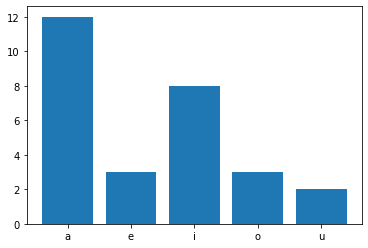

In [ ]:
plt.bar(vocales.index,vocales.values)

[lista de colores](https://matplotlib.org/stable/gallery/color/named_colors.html)

<BarContainer object of 5 artists>

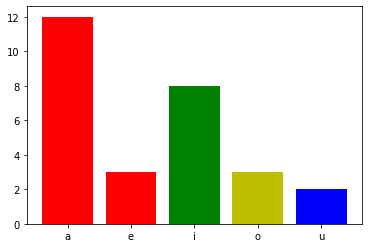

In [ ]:
plt.bar(vocales.index,vocales.values, color = ['r','r','g','y','b'])

## gráfico de torta

[referencia](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)

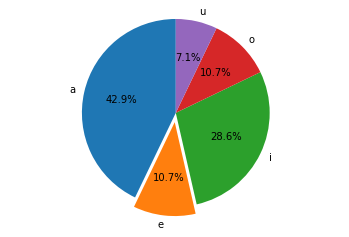

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = vocales.index
sizes = vocales.values
explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

En base al anterior código, replique este resultado

![](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fd617c028-1931-47c0-92e1-20f2b2f614fc%2FUntitled.png?table=block&id=d2f56060-d17e-4ca2-9901-a0b364f29952&spaceId=62aa27de-48fd-4703-8a40-2de64b627b11&width=700&userId=&cache=v2)


# 04 Seaborn
 [referencia](http://seaborn.pydata.org/examples/index.html)

![](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F2cf7d76c-c7b1-43c0-b55e-8703ba8e373c%2FUntitled.png?table=block&id=ca1edc02-265a-4939-8ce7-b7be32b163d7&spaceId=62aa27de-48fd-4703-8a40-2de64b627b11&width=1550&userId=&cache=v2)

### Recta

[referncia](https://seaborn.pydata.org/generated/seaborn.lineplot.html)



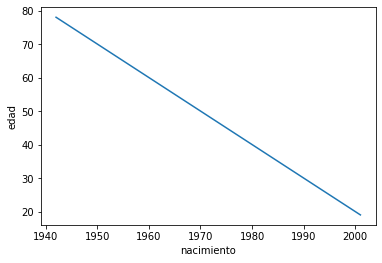

In [ ]:
import seaborn as sns
sns.lineplot(data=df_filtrado, x="nacimiento", y="edad")
plt.show()

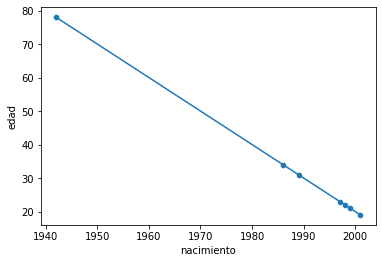

In [ ]:
import seaborn as sns
sns.lineplot(data=df_filtrado, x="nacimiento", y="edad")
sns.scatterplot(data=df_filtrado, x="nacimiento", y="edad")
plt.show()

### Barplot
https://seaborn.pydata.org/generated/seaborn.barplot.html

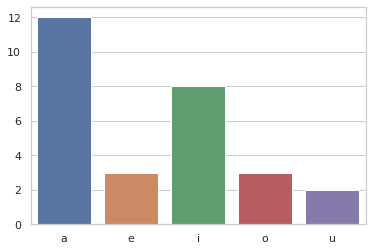

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x= vocales.index, y=vocales.values)

### pie chart
[referencia](https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/)

#05 Plotly

![](https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Ffa3748de-b07b-4cef-a636-3c1063aa134f%2FUntitled.png?table=block&id=2c462201-ceb3-4c52-aaa4-214cf334dee5&spaceId=62aa27de-48fd-4703-8a40-2de64b627b11&width=330&userId=&cache=v2)

[referencia](https://plotly.com/python/)

### Line

In [ ]:
import plotly.express as px

fig = px.line(df_filtrado, x="nacimiento", y="edad", title='fecha de nacimiento vs edad')
fig.show()

### Scatter
[referencia](https://plotly.com/python/line-and-scatter/)

In [ ]:
import plotly.express as px
fig = px.scatter(df_filtrado, x="nacimiento", y="edad", title='fecha de nacimiento vs edad')
fig.show()

### barplot
[referencia](https://plotly.com/python/bar-charts/)

In [ ]:
import plotly.express as px
fig = px.bar(x=vocales.index, y=vocales.values)
fig.show()

## Pie Chart

[referencia](https://plotly.com/python/pie-charts/)

In [ ]:
import plotly.express as px
fig = px.pie( values=vocales.values, names=vocales.index, title='% de vocales')
fig.show()